Sources: 

- https://nbviewer.org/github/FMZennaro/CausalInference/blob/master/Causal%20Inference.ipynb
- https://www.inference.vc/causal-inference-2-illustrating-interventions-in-a-toy-example/

# Causal Inference

This notebook runs a set of illustrative examples of causal inference taken from [Ferenc Huszar blogpost](https://www.inference.vc/causal-inference-2-illustrating-interventions-in-a-toy-example/). For the explanation and interepretation of the results shown below, please refer to the excellent blogpost.

## Setup

Importing libraries.

In [120]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display, Markdown

def md(x):
    return display(Markdown(x))

Setting parameters for running inference algorithms.

In [89]:
n_samples=10000

Defining a couple of support functions for visualization.

In [78]:
def jointplot(x, y, color, title):
    g = sns.jointplot(x, y, color=color)
    g.ax_joint.text(0.5, 0.9, f'pearson r {round(stats.pearsonr(x, y)[0], 2)}', transform=g.ax_joint.transAxes, ha='center')
    g.set_axis_labels(xlabel='x', ylabel='y')
    g.fig.suptitle(title)
    return g
    
def kdeplot(y, color, title):
    g = sns.kdeplot(y, color=color, label=title)
    return g

## Observational models
We define the three basic programs/models as presented in [here](https://www.inference.vc/causal-inference-2-illustrating-interventions-in-a-toy-example/) (see the blogpost for a clear representation of these models).

In [128]:
def model1():
    with pm.Model() as model1:
        x = pm.Normal('x', mu=0, sigma=1)
        y = pm.Deterministic('y', x + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['x'].values.flatten(), trace.posterior['y'].values.flatten(), model1
    
def model2():
    with pm.Model() as model2:
        y = pm.Deterministic('y', 1 + 2*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Deterministic('x', (y-1)/4 + np.sqrt(3)*pm.Normal('n1', mu=0, sigma=1)/2)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['x'].values.flatten(), trace.posterior['y'].values.flatten(), model2
    
def model3():
    with pm.Model() as model3:
        z = pm.Normal('z', mu=0, sigma=1)
        y = pm.Deterministic('y', z + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Deterministic('x', z)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['x'].values.flatten(), trace.posterior['y'].values.flatten(), model3

We use PyMC to sample and plot the joint distribution $P(X,Y)$ for the three models.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 24 seconds.
/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0, n1]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.
/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.
/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


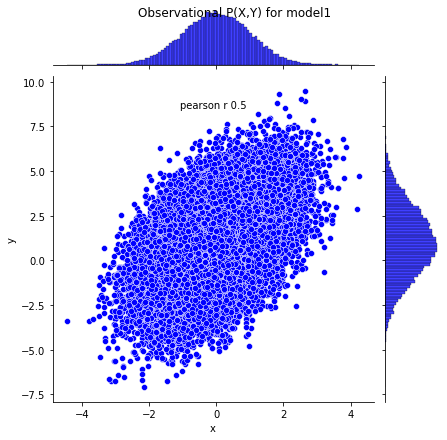

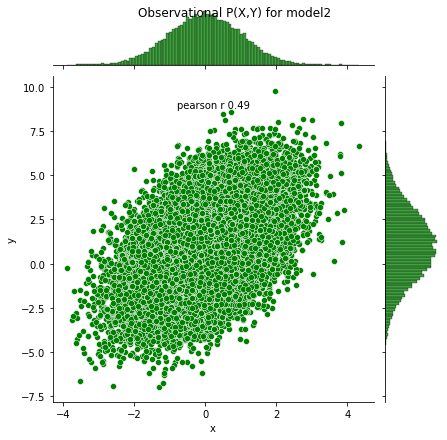

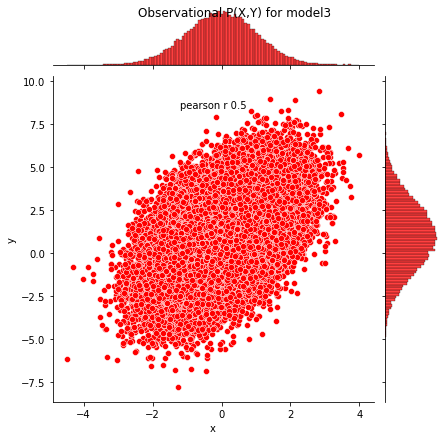

In [129]:
x, y, m1 = model1()
g1 = jointplot(x, y, color='blue', title='Observational P(X,Y) for model1')
 
x, y, m2 = model2()
g2 = jointplot(x, y, color='green', title='Observational P(X,Y) for model2')
 
x, y, m3 = model3()
g3 = jointplot(x, y, color='red', title='Observational P(X,Y) for model3')

As expected the three models show the same **observational** joint distribution.

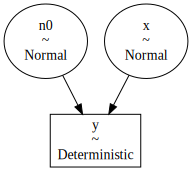

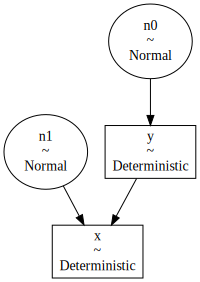

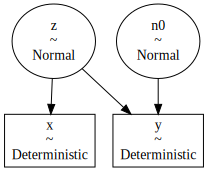

In [44]:
display(pm.model_to_graphviz(m1))

display(pm.model_to_graphviz(m2))

display(pm.model_to_graphviz(m3))

## Observational model under conditioning
We now analyze the behaviour of these three models under the **observation** $X=3$. We use again PyMC to redefine the models with the conditioning $X=3$. (Notice that the models has been slightly reformulated in order to get rid of the *Deterministic* object which can not be conditoned in PyMC).

In [73]:
def model1_observe_X_3():
    with pm.Model() as model1:
        x = pm.Normal('x', mu=0, sigma=1, observed=3)
        y = pm.Deterministic('y',x + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model1
    
def model2_observe_X_3():
    with pm.Model() as model2:
        y = pm.Deterministic('y', 1 + 2*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Normal('x', mu=(y-1)/4.0, sigma=3/4.0, observed=3)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model3
    
def model3_observe_X_3():
    with pm.Model() as model3:
        z = pm.Normal('z', mu=0, sigma=1,observed=3)
        y = pm.Deterministic('y',z + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Deterministic('x',z)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model3

We use again PyMC3 to sample from these models and estimate $P(Y \vert X=3)$ for the three models.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


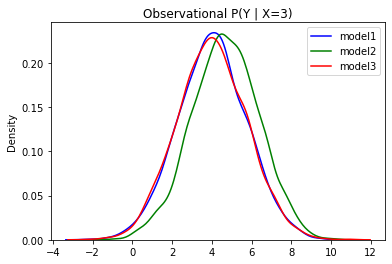

In [74]:
y1_x, m1 = model1_observe_X_3()
# jointplot(3*np.ones(y1_x.shape[0]), y1_x, color='blue', title='Observational P(X,Y | X=3) for model1')

y2_x, m2 = model2_observe_X_3()
#jointplot(3*np.ones(y2_x.shape[0]), y2_x, color='green', title='Observational P(X,Y | X=3) for model2')

y3_x, m3 = model3_observe_X_3()
#jointplot(3*np.ones(y3_x.shape[0]), y3_x, color='red', title='Observational P(X,Y | X=3) for model3')

plt.figure()
plt.title('Observational P(Y | X=3)')
kdeplot(y1_x, color='blue', title='model1')
kdeplot(y2_x, color='green', title='model2')
kdeplot(y3_x, color='red', title='model3')
plt.legend()

/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/boris.snapir/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


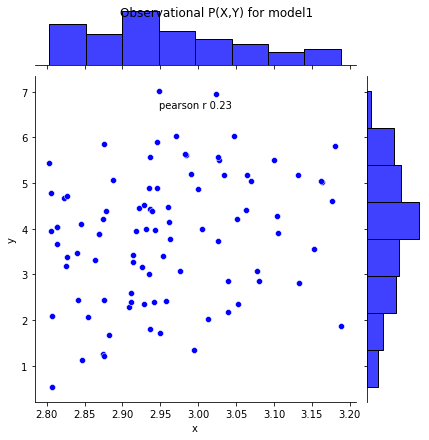

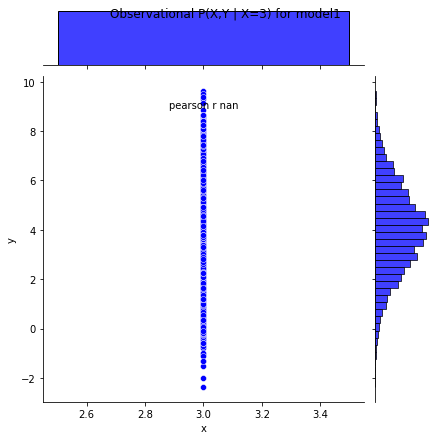

In [99]:
# or from the previous joint plot
eps = 0.2
jointplot(x[(x>=(3-eps))&(x<=(3+eps))], y[(x>=(3-eps))&(x<=(3+eps))], color='blue', title='Observational P(X,Y) for model1')

jointplot(3*np.ones(y1.shape[0]), y1_x, color='blue', title='Observational P(X,Y | X=3) for model1')

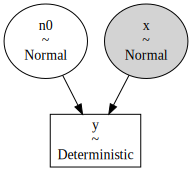

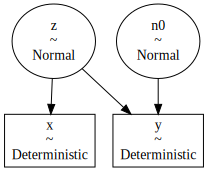

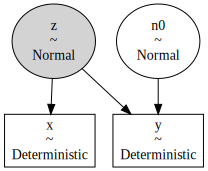

In [69]:
display(pm.model_to_graphviz(m1))

display(pm.model_to_graphviz(m2))

display(pm.model_to_graphviz(m3))

# Interventional model under do-action
We now analyze the behaviour of these three models under the **intervention** $X=3$. We redefine the models and we force $X=3$ (formally, this amount to redefine the model under *mutilation* with the *structural equation* for $X$ fixed to 3).

In [116]:
def model1_do_X_3():
    with pm.Model() as model:
        x = pm.Data('x', 3, mutable=False)
        y = pm.Deterministic('y',x + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model
    
def model2_do_X_3():
    with pm.Model() as model:
        y = pm.Deterministic('y', 1 + 2*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Data('x', 3, mutable=False)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model
    
def model3_do_X_3():
    with pm.Model() as model:
        z = pm.Normal('z', mu=0, sigma=1)
        y = pm.Deterministic('y',z + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Data('x', 3, mutable=False)
        trace = pm.sample(n_samples, chains=1)
        return trace.posterior['y'].values.flatten(), model

We now sample from the interventional models and estimate $P(Y \vert do(X=3))$.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.7177, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 21 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, n0]
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 21 seconds.


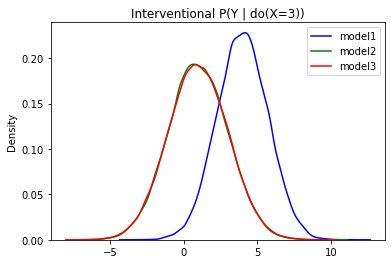

In [117]:
y1, m1 = model1_do_X_3()
#jointplot(3*np.ones(y1.shape[0]), y1, color='blue', title='Interventional P(X,Y | do(X=3)) for model1')

y2, m2 = model2_do_X_3()
#jointplot(3*np.ones(y2.shape[0]), y2, color='green', title='Interventional P(X,Y | do(X=3)) for model2')

y3, m3 = model3_do_X_3()
#jointplot(3*np.ones(y3.shape[0]), y3, color='red', title='Interventional P(X,Y | do(X=3)) for model3')

plt.figure()
plt.title('Interventional P(Y | do(X=3))')
kdeplot(y1, color='blue', title='model1')
kdeplot(y2, color='green', title='model2')
kdeplot(y3, color='red', title='model3')
plt.legend()

The **interventional** distributions $P(Y \vert do(X=3))$ are not the same anymore.

The DAGs reflect how the do intervention corresponds to removing arrows going to x.

Since there is no arrow going to x for model1, the result is the same as $p(y|x=3)$.

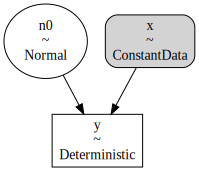

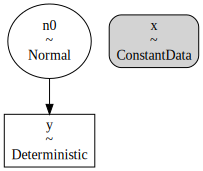

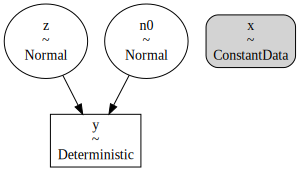

In [125]:
md('The DAGs reflect how the do intervention corresponds to removing arrows going to x.')
md('Since there is no arrow going to x for model1, the result is the same as $p(y|x=3)$.')
display(pm.model_to_graphviz(model1))

display(pm.model_to_graphviz(model2))

display(pm.model_to_graphviz(model3))

## Individual counterfactual
We now examine individual **counterfactuals**. To do this, we sample from the a model, and then we perform the **intervention** $X=3$ *while keeping everything else unmodified* (formally, this amount to sampling from the model, keeping the value of the *exogenous nodes* of the *SEM model*, performing the intervention, and then computing the counterfactual of interest).

In [138]:
def model1_counterfactual_X_3():
    with pm.Model() as model:
        x = pm.Normal('x', mu=0, sigma=1)
        y = pm.Deterministic('y',x + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        trace = pm.sample(draws=1, chains=1)
        trace = trace.posterior
        
        factual_x = trace['x'].values
        factual_y = trace['y'].values
        factual_n0 = trace['n0'].values
        
        counterfactual_x = 3
        counterfactual_y = counterfactual_x + 1 + factual_n0
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y, model

def model2_counterfactual_X_3():
    with pm.Model() as model:
        y = pm.Deterministic('y', 1 + 2*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Deterministic('x', (y-1)/4 + np.sqrt(3)*pm.Normal('n1', mu=0, sigma=1)/2)
        trace = pm.sample(draws=1, chains=1)
        trace = trace.posterior
        
        factual_x = trace['x'].values
        factual_y = trace['y'].values
        factual_n0 = trace['n0'].values
        factual_n1 = trace['n1'].values
        
        counterfactual_y = factual_y
        counterfactual_x = 3
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y, model

def model3_counterfactual_X_3():
    with pm.Model() as model:
        z = pm.Normal('z', mu=0, sigma=1)
        y = pm.Deterministic('y',z + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sigma=1))
        x = pm.Deterministic('x',z)
        trace = pm.sample(draws=1, chains=1)
        trace = trace.posterior
        
        factual_z = trace['x'].values
        factual_x = trace['x'].values
        factual_y = trace['y'].values
        factual_n0 = trace['n0'].values
        
        counterfactual_y = factual_z + 1 + np.sqrt(3)*factual_n0
        counterfactual_x = 3
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y, model

In [140]:
factual_x, factual_y, counterfactual_x, counterfactual_y, m1 = model1_counterfactual_X_3()
print('MODEL1 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL1 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

factual_x, factual_y, counterfactual_x, counterfactual_y, _ = model1_counterfactual_X_3()
print('MODEL1 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL1 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

factual_x, factual_y, counterfactual_x, counterfactual_y, m2 = model2_counterfactual_X_3()
print('MODEL2 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL2 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

factual_x, factual_y, counterfactual_x, counterfactual_y, _ = model2_counterfactual_X_3()
print('MODEL2 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL2 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

factual_x, factual_y, counterfactual_x, counterfactual_y, m3 = model3_counterfactual_X_3()
print('MODEL3 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL3 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

factual_x, factual_y, counterfactual_x, counterfactual_y, _ = model3_counterfactual_X_3()
print('MODEL3 - Factual (x,y): {0}, {1}'.format(factual_x, factual_y))
print('MODEL3 - Counterfactual (x,y): {0}, {1}'.format(counterfactual_x, counterfactual_y))

Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [x, n0]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.
/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:5: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)
Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


MODEL1 - Factual (x,y): [[-0.55599112]], [[1.36860387]]
MODEL1 - Counterfactual (x,y): 3, [[4.53381517]]


Sequential sampling (1 chains in 1 job)
NUTS: [x, n0]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.
/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:5: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)
Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


MODEL1 - Factual (x,y): [[0.64109723]], [[2.79808214]]
MODEL1 - Counterfactual (x,y): 3, [[4.66798555]]


Sequential sampling (1 chains in 1 job)
NUTS: [n0, n1]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.
/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:21: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)
Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


MODEL2 - Factual (x,y): [[0.68912449]], [[0.78241411]]
MODEL2 - Counterfactual (x,y): 3, [[0.78241411]]


Sequential sampling (1 chains in 1 job)
NUTS: [n0, n1]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.
/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:21: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)
Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


MODEL2 - Factual (x,y): [[0.88781332]], [[0.37646738]]
MODEL2 - Counterfactual (x,y): 3, [[0.37646738]]


Sequential sampling (1 chains in 1 job)
NUTS: [z, n0]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.
/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:39: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)
Only 1 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


MODEL3 - Factual (x,y): [[0.23869372]], [[-1.48613692]]
MODEL3 - Counterfactual (x,y): 3, [[-1.48613692]]


Sequential sampling (1 chains in 1 job)
NUTS: [z, n0]


Sampling 1 chain for 1_000 tune and 1 draw iterations (1_000 + 1 draws total) took 0 seconds.


MODEL3 - Factual (x,y): [[0.99338443]], [[0.01262663]]
MODEL3 - Counterfactual (x,y): 3, [[0.01262663]]


/var/folders/6t/pdsff04n08q7by5ksbcl77_r0000gq/T/ipykernel_25875/2856923544.py:39: UserWarning: The number of samples is too small to check convergence reliably.
  trace = pm.sample(draws=1, chains=1)


Notice how the **counterfactual** value of $Y$ changes in *model1* wrt to its **factual** value; this means that, in *model1*, the value of $Y$ would change if we were to perform the intervention $X=3$ while keeping everything else the same.

Differently the **counterfactual** value of $Y$ does NOT change in *model2* and *model3* wrt to its **factual** value; this means that, in *model2* and *model3*, the value of $Y$ would NOT change if we were to perform the intervention $X=3$ while keeping everything else the same.

These results make sense when we consider that under the intervention $do(X=3)$, the variables $X$ and $Y$ become independent in *model2* and *model3* (formally, this can be seen by performing the *mutilation* of the *SEM* graph). It is not surprising then, that if we intervene on $X$, the value of $Y$ simply remains the same (because of its independence from $X$).

## Counterfactuals
We consider now the distribution of of **counterfactuals** $P(Y^* \vert X^*=3)$ (using the notation in the [blogpost](https://www.inference.vc/causal-inference-3-counterfactuals/)). We use the same approach as before.

In [14]:
def model1_counterfactual_X_3():
    with pm.Model():
        x = pm.Normal('x', mu=0, sd=1)
        y = pm.Deterministic('y',x + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sd=1))
        trace = pm.sample(n_samples*2,chains=1)
        
        factual_x = trace['x']
        factual_y = trace['y']
        factual_n0 = trace['n0']
        
        counterfactual_x = 3*np.ones(n_samples*2)
        counterfactual_y = counterfactual_x + 1 + factual_n0
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y

def model2_counterfactual_X_3():
    with pm.Model():
        y = pm.Deterministic('y', 1 + 2*pm.Normal('n0', mu=0, sd=1))
        x = pm.Deterministic('x', (y-1)/4 + np.sqrt(3)*pm.Normal('n1', mu=0, sd=1)/2)
        trace = pm.sample(n_samples*2,chains=1)
        
        factual_x = trace['x']
        factual_y = trace['y']
        factual_n0 = trace['n0']
        factual_n1 = trace['n1']
        
        counterfactual_y = factual_y
        counterfactual_x = 3*np.ones(n_samples*2)
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y

def model3_counterfactual_X_3():
    with pm.Model():
        z = pm.Normal('z', mu=0, sd=1)
        y = pm.Deterministic('y',z + 1 + np.sqrt(3)*pm.Normal('n0', mu=0, sd=1))
        x = pm.Deterministic('x',z)
        trace = pm.sample(n_samples*2,chains=1,verbose=-1)
        
        factual_z = trace['x']
        factual_x = trace['x']
        factual_y = trace['y']
        factual_n0 = trace['n0']
        
        counterfactual_y = factual_z + 1 + np.sqrt(3)*factual_n0
        counterfactual_x = 3*np.ones(n_samples*2)
        
        return factual_x, factual_y, counterfactual_x, counterfactual_y

We sample and evaluate the *observational* distribution $P(Y\vert X)$ and the related *counterfactual* distribution $P(Y^*\vert X^*=3)$ under the intervention $do(X=3)$.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [n0, x]
100%|██████████| 2500/2500 [00:00<00:00, 2620.05it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [n1, n0]
100%|██████████| 2500/2500 [00:00<00:00, 2631.60it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [n0, x]
100%|██████████| 2500/2500 [00:00<00:00, 2561.84it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
/home/fmzennaro/miniconda2_1/envs/pymc3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

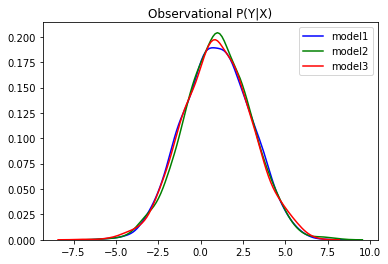

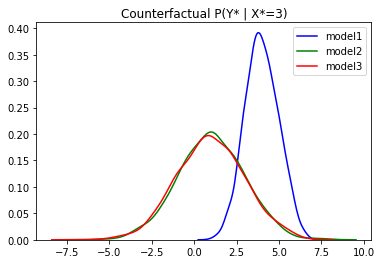

In [15]:
factual_x1, factual_y1, counterfactual_x1, counterfactual_y1 = model1_counterfactual_X_3()
factual_x2, factual_y2, counterfactual_x2, counterfactual_y2 = model2_counterfactual_X_3()
factual_x3, factual_y3, counterfactual_x3, counterfactual_y3 = model3_counterfactual_X_3()

plt.figure()
plt.title('Observational P(Y|X)')
kdeplot(factual_y1, color='blue', title='model1')
kdeplot(factual_y2, color='green', title='model2')
kdeplot(factual_y3, color='red', title='model3')
plt.legend()

plt.figure()
plt.title('Counterfactual P(Y* | X*=3)')
kdeplot(counterfactual_y1, color='blue', title='model1')
kdeplot(counterfactual_y2, color='green', title='model2')
kdeplot(counterfactual_y3, color='red', title='model3')
plt.legend()

Consistently with the result before, the marginal distribution of $Y$ does not change in the **observational** and in the **counterfactual** model for *model2* and *model3*, due to the fact that under intervention $X$ and $Y$ are independent. 

Instead, for *model1*, we actually register a different between the **observational** and in the **counterfactual** model, due to the fact that intervening on $X$ does affect the outcome of $Y$.